# Road safety clustering demo code
Please feel free to do any modifications.<br>
Data file ``NYPD_Motor_Vehicle_Collisions.csv`` required has been included in ``resources.dat``.
### i - Imports

In [1]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### ii - Load data

In [2]:
%%time
df = pd.read_csv('NYPD_Motor_Vehicle_Collisions.csv', low_memory=False)

CPU times: user 7.82 s, sys: 1.19 s, total: 9.02 s
Wall time: 9.14 s


### iii - Data visualisation

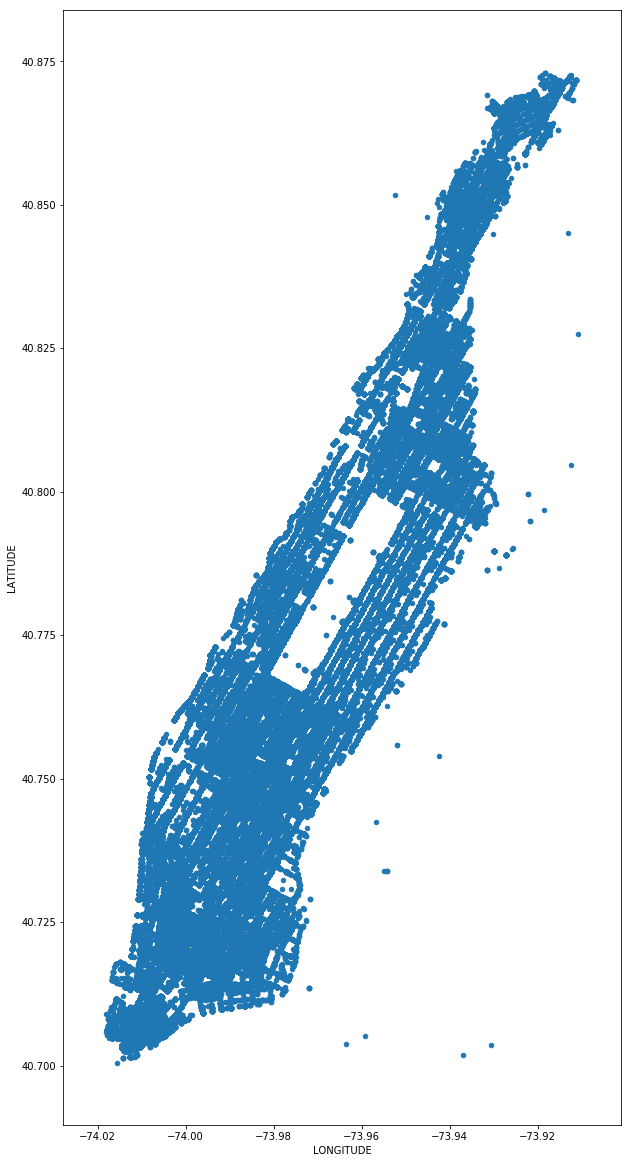

In [3]:
df_mht = df[df['BOROUGH'] == 'MANHATTAN']
df_mht = df_mht[['LATITUDE', 'LONGITUDE']].dropna()
df_mht = df_mht[df_mht['LONGITUDE'] >= -74.02]
df_mht = df_mht[df_mht['LONGITUDE'] <= -73.91]
df_mht = df_mht[df_mht['LATITUDE'] >= 40.70]
df_mht = df_mht[df_mht['LATITUDE'] <= 40.89]
df_mht.plot(x='LONGITUDE', y='LATITUDE', kind='scatter', figsize=(10, 20.5))
plt.show()

### iv - K-Means clustering demo

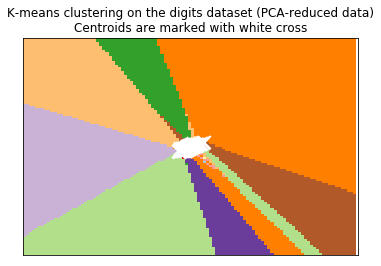

In [4]:
# Set random seed.
np.random.seed(42)

# Construct and fit K-Means clustering object.
kmeans = KMeans(init='k-means++', n_clusters=100, n_init=10)
kmeans.fit(df_mht.values)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02

# Plot the decision boundaries and assign a color to each of them.
x_min, x_max = df_mht.values[:, 0].min() - 1, df_mht.values[:, 0].max() + 1
y_min, y_max = df_mht.values[:, 1].min() - 1, df_mht.values[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the results into a coloured plot.
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.plot(df_mht.values[:, 0], df_mht.values[:, 1], 'k.', markersize=2)

# Plot the centroids as white Xs.
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the streetmap')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()